In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/wheeler/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages (0.0)
Requirement already up-to-date: sklearn in /Users/wheeler/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter('ignore')

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
df = df[df["koi_disposition"] != 'CANDIDATE']
df["koi_disposition"].value_counts()


FALSE POSITIVE    3504
CONFIRMED         1800
Name: koi_disposition, dtype: int64

FALSE POSITIVE    3504
CONFIRMED         1800
Name: koi_disposition, dtype: int64

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad']]
selected_features.koi_period.astype(float)

0       54.418383
1       19.899140
2        1.736952
3        2.525592
4        4.134435
          ...    
6983    21.513523
6986     8.589871
6987     0.527699
6989     0.681402
6990     4.856035
Name: koi_period, Length: 5304, dtype: float64

0       54.418383
1       19.899140
2        1.736952
3        2.525592
4        4.134435
          ...    
6983    21.513523
6986     8.589871
6987     0.527699
6989     0.681402
6990     4.856035
Name: koi_period, Length: 5304, dtype: float64

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
# Use train_test_split to create training and testing data
df['koi_disposition_dummy'] = df.koi_disposition.map({'FALSE POSITIVE':0, 'CONFIRMED':1})
y = df['koi_disposition_dummy']

In [8]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)

In [9]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [10]:
X_train.head()

,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad
979,41.077297,0.030,5.52500,1216.8,3.25,523,17.74,5665,4.381,0.938
6201,13.639480,1.033,3.12422,81103.0,44.00,680,50.51,5461,4.517,0.846
5648,14.854416,0.570,5.13753,77410.0,29.77,798,95.83,6214,4.444,1.022
229,10.681695,0.646,3.60500,307.8,2.30,897,152.75,5553,4.221,1.250
1302,12.509458,0.626,3.47900,155.3,1.54,875,138.54,5949,4.303,1.184


,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad
979,41.077297,0.030,5.52500,1216.8,3.25,523,17.74,5665,4.381,0.938
6201,13.639480,1.033,3.12422,81103.0,44.00,680,50.51,5461,4.517,0.846
5648,14.854416,0.570,5.13753,77410.0,29.77,798,95.83,6214,4.444,1.022
229,10.681695,0.646,3.60500,307.8,2.30,897,152.75,5553,4.221,1.250
1302,12.509458,0.626,3.47900,155.3,1.54,875,138.54,5949,4.303,1.184


In [11]:
y_train.head()

979     0
6201    0
5648    0
229     1
1302    1
Name: koi_disposition_dummy, dtype: int64

979     0
6201    0
5648    0
229     1
1302    1
Name: koi_disposition_dummy, dtype: int64

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.756
k: 3, Train/Test Score: 0.877/0.769
k: 1, Train/Test Score: 1.000/0.756
k: 3, Train/Test Score: 0.877/0.769
k: 5, Train/Test Score: 0.851/0.779
k: 7, Train/Test Score: 0.842/0.786
k: 5, Train/Test Score: 0.851/0.779
k: 7, Train/Test Score: 0.842/0.786
k: 9, Train/Test Score: 0.832/0.778
k: 11, Train/Test Score: 0.829/0.785
k: 9, Train/Test Score: 0.832/0.778
k: 11, Train/Test Score: 0.829/0.785
k: 13, Train/Test Score: 0.826/0.789
k: 15, Train/Test Score: 0.822/0.787
k: 13, Train/Test Score: 0.826/0.789
k: 15, Train/Test Score: 0.822/0.787
k: 17, Train/Test Score: 0.823/0.783
k: 19, Train/Test Score: 0.822/0.785
k: 17, Train/Test Score: 0.823/0.783
k: 19, Train/Test Score: 0.822/0.785


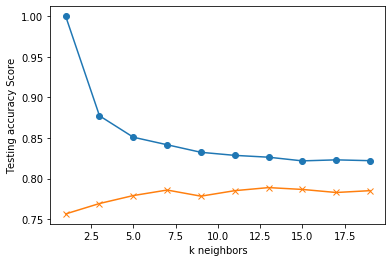

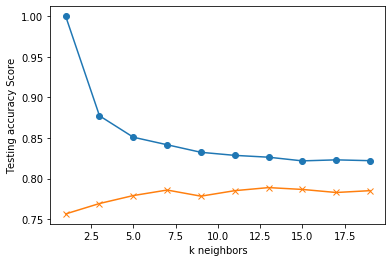

In [14]:
from sklearn.neighbors import KNeighborsClassifier 
    # Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [15]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.789
k=13 Test Acc: 0.789


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [16]:
# Create the GridSearchCV model
#from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [1, 5, 10]}

#grid = GridSearchCV(model, param_grid, verbose=3)

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch. 
#Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'jeff_wheeler_model2.sav'
joblib.dump(knn, filename)